# First approach on ideal modelling



1. Implementing all necessary packages

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS, origin_like,D_Matrix,Gammaij,vpure,DIdeal2DReal,dlnai_dlnxi,lngi
import matplotlib.pyplot as plt

def TgGT(wi,Tg0i,q=0,Ki=None,rho0i=None):
    """
    Compute the glass transition temperature of a mixture  
    
    Args:
        wi (array_like): 2D Array of weight fractions [ number of components,number of Points]
        Tg0i (array_like): pure component glass transition temperature /K
        q (array_like): Kwei parameter /-
        rho0i (optional,array_like) : pure component densities /kg/m^3
        Ki (optional,array_like): Gordon-Taylor parameters         /-
    Returns:
        ndarray:   
        glass transition temperature of a mixture  /K 
    """
    nc=Tg0i.shape[0]
    qmat=np.zeros((nc,nc))
    qmat[np.triu_indices(nc, k=1)]=q
    Excess=np.asarray([np.sum(np.outer(wi[:,i],wi[:,i])*qmat) for i,val in enumerate(wi[0,:])])
    if Ki is None and rho0i is not None:
        Ideal=np.sum(wi*1/rho0i[:,None],axis=0)/np.sum(wi*1/rho0i[:,None]/Tg0i[:,None],axis=0)
    elif Ki is not None and rho0i is None:
        Ideal=np.sum(wi*Ki[:,None]*Tg0i[:,None],axis=0)/np.sum(wi*Ki[:,None],axis=0)
    elif Ki is None and rho0i is None:
        Ideal=np.sum(wi*1/rho0i[:,None],axis=0)
    else:
        Ideal=np.sum(wi*Ki[:,None]*Tg0i[:,None],axis=0)/np.sum(wi*Ki[:,None],axis=0)
    return Ideal+Excess
Mi=np.asarray([357.79,65000,18.015])
nc=len(Mi)
T=298.15
p=1E5

kij=D_Matrix(np.asarray([-0.0621,-0.025,-0.156]),nc)
par={"mi":np.asarray([14.283,2420.99,1.2046 ]),
"si": np.asarray([3.535,2.947, 2.797059952]),
"ui" :np.asarray([262.79,205.27,353.95 ]),
"eAi" :np.asarray([886.4,0.,2425.67 ]),
"kAi":np.asarray([ 0.02,0.02,0.04509 ]),
"NAi":np.asarray([3.,653., 1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

#RTV?PVPVA?/W
# Mi= np.asarray([720.948,65000,18.02])
# p=1E5
# T=298.15
# nc=len(Mi)
# kij=D_Matrix(np.asarray([0.019,-0.0605,-0.156]),nc)
# par={"mi":np.asarray([15.88464728,2420.99,1.2046 ]),
# "si": np.asarray([3.90027,2.947, 2.797059952]),
# "ui" :np.asarray([305.787,205.27,353.95 ]),
# "eAi" :np.asarray([1040.969,0.,2425.67 ]),
# "kAi":np.asarray([ 0.02,0.02,0.04509 ]),
# "NAi":np.asarray([4.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi :lngi(T,wi,**par)
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,np.ascontiguousarray(wi),**par)
Gammaij_fun=lambda wi: Gammaij(T,wi,par)
# plt.rcdefaults()

import the input data for diffusionpy from master thesis

Set the Information of the Process (temperature, pressure, wi0, wi8, L, D)

In [2]:
T=298.15
p=1E5
nc=3 # number of components
L=1E-4 # estimated thickness of the ASD
wi0=np.asarray([0.49999,0.49999,0.00002]) # Weight fractions of the components API, polymer, water at t=0
wi8=np.asarray([0.00001,0.00001,0.99998]) # Weight fractions of the components API, polymer, water at t=8.T
Mi= np.asarray([357.79,65000,16.02])

Creating a vector which holds the MS diffusion coefficients

In [3]:
Dvec =np.asarray([1E-5,2E-12,8E-12])

Calculate the values for the concentrations inside the ASD

1.5478437759694947e+39
2.971805611975102e+36
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.118678507448039
             x: [ 6.250e-12  6.251e-12  1.166e-15]
           nit: 77
          nfev: 136
 final_simplex: (array([[ 6.250e-12,  6.251e-12,  1.166e-15],
                       [ 6.216e-12,  6.216e-12,  1.167e-15],
                       [ 6.252e-12,  6.252e-12,  1.166e-15],
                       [ 6.226e-12,  6.226e-12,  1.165e-15]]), array([ 4.119e+00,  4.119e+00,  4.119e+00,  4.119e+00]))
0.001919964829857967
[1.00000000e-12 8.11372187e-13 2.54265066e-16]
[6.25047800e-12 6.25066967e-12 1.16602859e-15]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.3787941 seconds ----------------
------------- Initialization and postprocessing took 0.0052833 seconds----------------
1.1813098551712348e+39
1.6812510936287

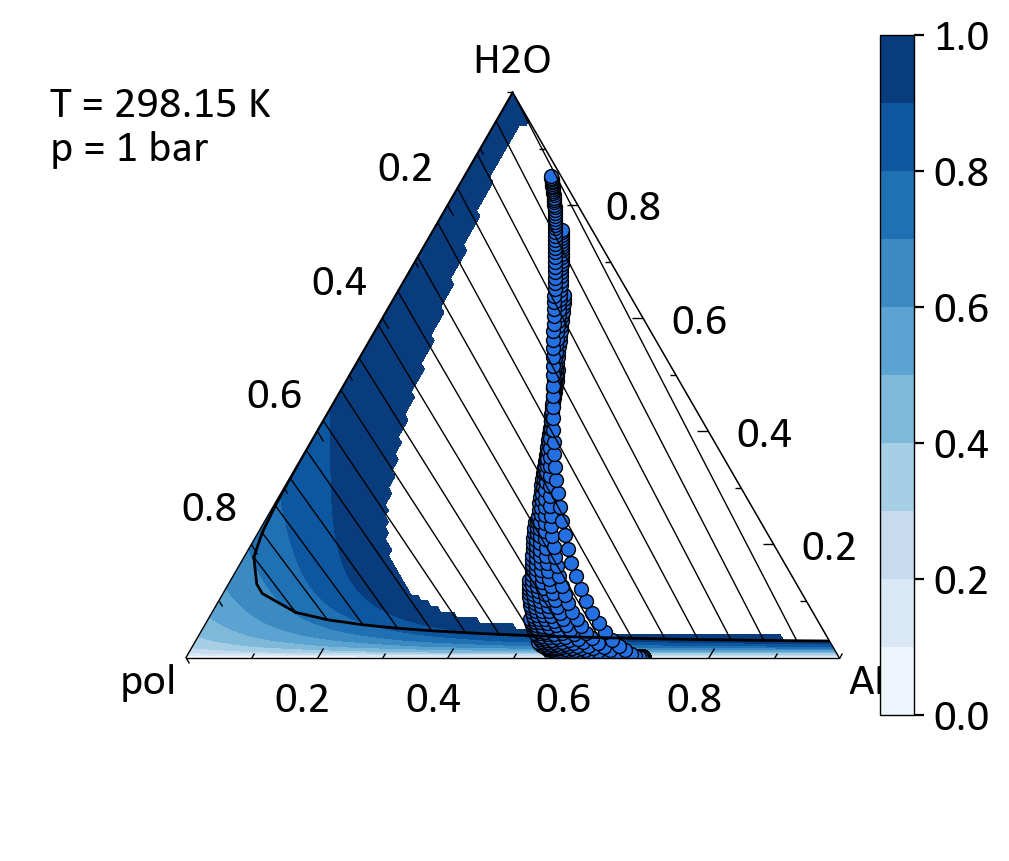

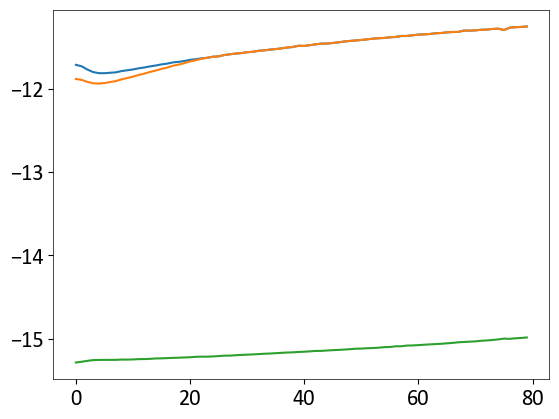

0.12967452694579407
0.16376562500000003


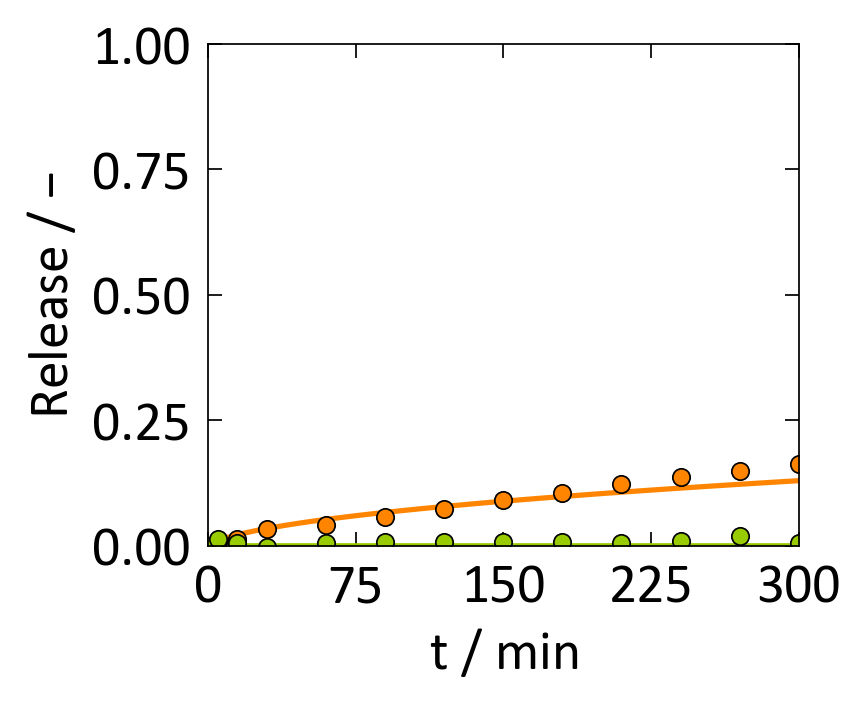

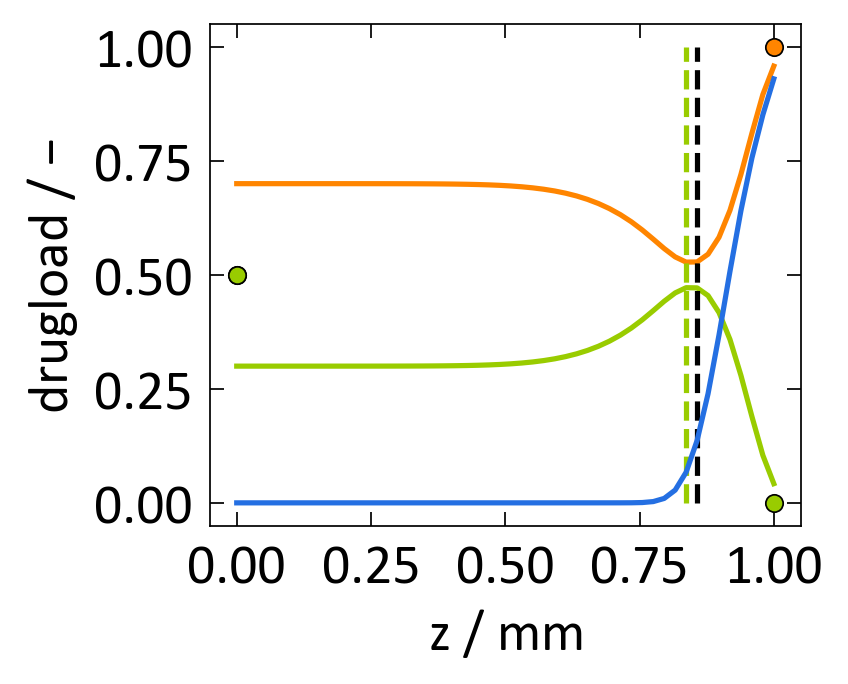

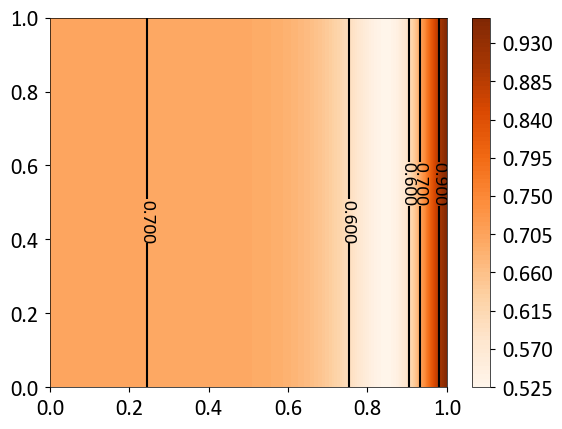

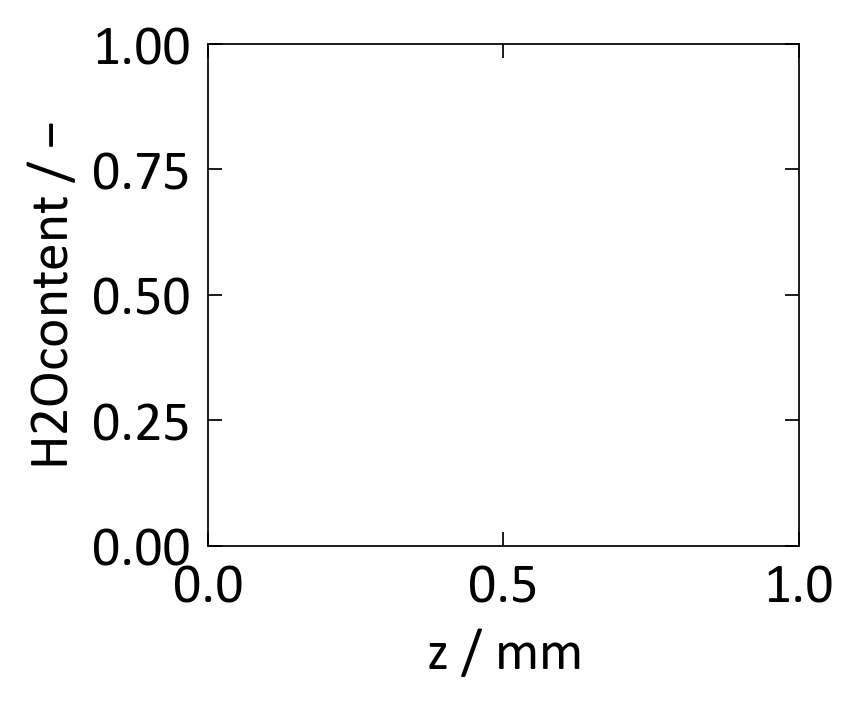

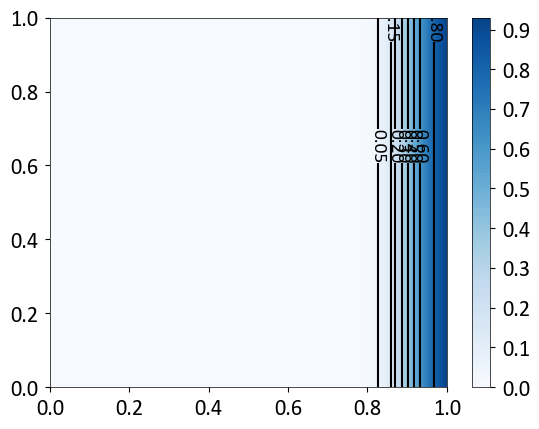

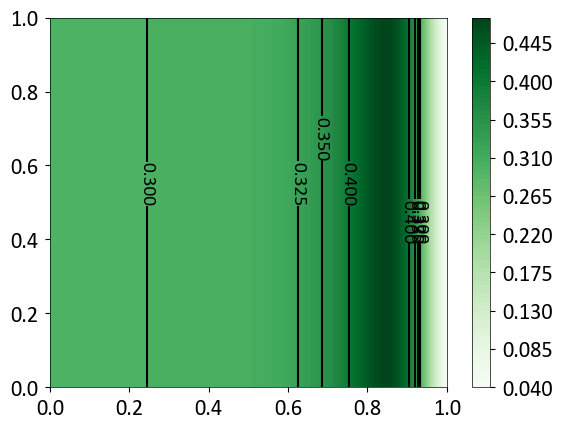

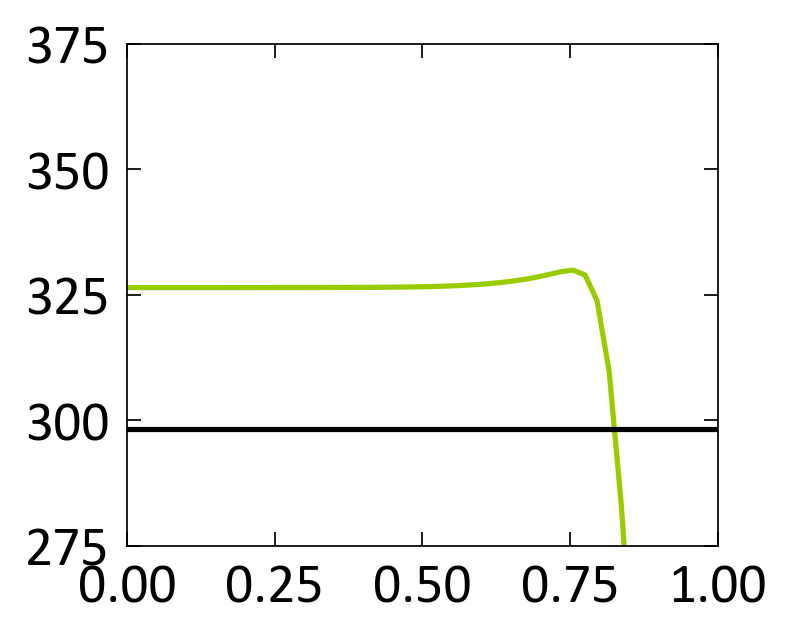

In [11]:
import numpy as np
from numpy import array
import scipy as sp
from diffusionpy import Diffusion_MS, origin_like
import matplotlib.pyplot as plt
plt.rcdefaults()
from scipy.optimize import curve_fit
import xlwings as xw
import pandas as pd

texp=array([0,5,15,30,60,90,120,150,180,210,240,270,300])*60
wINDL1D03= array([0,3.42274E-07,6.63373000e-07,1.30293000e-06,2.61848000e-06,4.06235000e-06,5.50577000e-06,7.11082000e-06,8.82865000e-06,1.03757000e-05,1.22831000e-05,1.34226000e-05,1.48856000e-05])
wPolL1D03= array([0,5.1687E-06,8.11419000e-06,1.16988000e-05,1.82872000e-05,2.43481000e-05,2.97692000e-05,3.50846000e-05,3.91787000e-05,4.30863000e-05,4.68326000e-05,4.92799000e-05,5.08487000e-05])
wH2OL1D03= array([1,9.99994489e-01,9.99991222e-01,9.99986998e-01,9.99979094e-01,9.99971590e-01,9.99964725e-01,9.99957805e-01,9.99951993e-01,9.99946538e-01,9.99940884e-01,9.99937297e-01,9.99934266e-01])
wINDL1D05= array([0,5.95664000e-07,1.11906000e-06,1.85585000e-06,3.47314000e-06,4.42371000e-06,6.09469000e-06,7.07050000e-06,8.10867000e-06,9.81494000e-06,1.09211000e-05,1.22759000e-05,1.35512000e-05])
wPolL1D05=array([0,7.34838000e-07,1.07111000e-06,1.42408000e-06,1.86380000e-06,1.99883000e-06,2.04584000e-06,2.04858000e-06,1.96896000e-06,2.13912000e-06,2.19015000e-06,2.16470000e-06,2.24988000e-06])
wH2OL1D05=array([1,9.99998669e-01,9.99997810e-01,9.99996720e-01,9.99994663e-01,9.99993577e-01,9.99991859e-01,9.99990881e-01,9.99989922e-01, 9.99988046e-01,9.99986889e-01,9.99985559e-01,9.99984199e-01])
wINDL1D07= array([0,6.52542000e-07,1.19485000e-06,2.98026000e-06,3.78514000e-06,5.18938000e-06,6.62873000e-06,8.19091000e-06,9.45838000e-06,1.10233000e-05,1.23274000e-05,1.34266000e-05,1.46734000e-05])
wPolL1D07=array([0,5.43067000e-07,2.32437000e-07,-1.31550000e-07,2.39324000e-07,3.19550000e-07,3.11173000e-07,3.24043000e-07,2.83174000e-07,1.86216000e-07,3.26324000e-07,7.64666000e-07,2.35801000e-07])
wH2OL1D07=array([1,9.99998804e-01,9.99998573e-01,9.99997151e-01,9.99995976e-01,9.99994491e-01,9.99993060e-01,9.99991485e-01,9.99990258e-01,9.99988790e-01,9.99987346e-01,9.99985809e-01,9.99985091e-01])
wINDL25D03=array([0,3.38334000e-07,7.27514000e-07,1.13529000e-06,2.29403000e-06,3.20807000e-06,4.11030000e-06,4.97144000e-06,5.76267000e-06,6.66612000e-06,7.58597000e-06,8.33222000e-06,9.19885000e-06])
wPolL25D03=array([0,2.47540000e-06,5.76787000e-06,9.85161000e-06,1.43790000e-05,1.61947000e-05,1.67283000e-05,1.71512000e-05,1.73003000e-05,1.73463000e-05,1.71751000e-05,1.73692000e-05,1.75724000e-05])
wH2OL25D03=array([1,9.99997186e-01,9.99993505e-01,9.99989013e-01,9.99983327e-01,9.99980597e-01,9.99979161e-01,9.99977877e-01,9.99976937e-01,9.99975988e-01,9.99975239e-01,9.99974299e-01,9.99973229e-01])
wINDL25D05=array([0,4.58354000e-07,9.25174000e-07,1.14901000e-06,2.66209000e-06,3.70568000e-06,4.83550000e-06,5.81176000e-06,6.78711000e-06,7.66320000e-06,8.61049000e-06,9.53598000e-06,1.05918000e-05])
wPolL25D05=array([0,7.44788000e-07,1.15094000e-06,1.84658000e-06,1.41097000e-06,1.55351000e-06,1.53632000e-06,1.52075000e-06,1.54180000e-06,1.58611000e-06,1.63294000e-06,1.67478000e-06,1.54857000e-06])
wH2OL25D05=array([1,9.99998797e-01,9.99997924e-01,9.99997004e-01,9.99995927e-01,9.99994741e-01,9.99993628e-01,9.99992667e-01,9.99991671e-01,9.99990751e-01,9.99989757e-01, 9.99988789e-01,9.99987860e-01])
wINDL25D07=array([0,2.10882000e-07,9.53317000e-07,1.13081000e-06,2.30461000e-06,4.49098000e-06,5.31209000e-06,6.49505000e-06,7.53254000e-06, 8.76421000e-06,1.00650000e-05,1.11047000e-05,1.21564000e-05])
wPolL25D07=array([0,1.17370000e-07,2.51991000e-08,1.62530000e-07,-7.93003000e-08,-3.38246000e-08, 1.63026000e-08,6.65202000e-08,1.43608000e-08,8.95516000e-08,6.91439000e-07,-7.68527000e-07,-7.18490000e-08])
wH2OL25D07=array([1,9.99999672e-01,9.99999021e-01,9.99998707e-01,9.99997775e-01,9.99995543e-01,9.99994672e-01,9.99993438e-01,9.99992453e-01,9.99991146e-01,9.99989244e-01,9.99989664e-01,9.99987915e-01])
mB_0 = 0.5
mASDL25D03_0= 1.5E-5
mASDL1D03_0= 6.2E-5
mASDL25D05_0= 1.6E-5
mASDL1D05_0= 6.3E-5
mASDL25D07_0= 1.6E-5
mASDL1D07_0= 6.4E-5
Mi= np.asarray([357.79,65000,16.02])
mobile= np.asarray([True,True,True])
wi_8 =np.asarray([0.0001,0.0001,0.9998])
Dvec =np.asarray([1E-1,2E-12,8E-1])
Dvec=np.asarray([327081.87865031627,386294.20602000307,644379.7545334897])/1E14

Dvec=np.asarray([244258.29860143378,
632465.849552949,
762682.380133524])/1E14
nt=80
t=np.linspace(0,texp[-1]**0.5,nt)**2

def Conc_ASD(wAPI_B,w0API_B,w0API_ASD,wPol_B,w0Pol_B,w0Pol_ASD,wH2O_B,w0H2O_B,w0H2O_ASD,m_B,m_ASD):
   
    wAPI_ASD= (w0API_B-wAPI_B)*(m_B/m_ASD)+w0API_ASD
    wPol_ASD=(w0Pol_B-wPol_B)*(m_B/m_ASD)+w0Pol_ASD
    wH2O_ASD= (w0H2O_B-wH2O_B)*(m_B/m_ASD)+w0H2O_ASD
    wges_ASD= wAPI_ASD + wPol_ASD + wH2O_ASD
    return wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD


def plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    wAPI_ASD=1-wAPI_ASD/wAPI_ASD[0]
    wPol_ASD=1-wPol_ASD/wPol_ASD[0]
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    plt.plot(texp, wAPI_ASD,'ro')
    plt.plot(texp,wPol_ASD,'go')
    # plt.plot(texp,wH2O_ASD,'bo')
    # plt.plot(texp,wges_ASD,'yo')


    
    plt.xlabel("t [s]")
    plt.ylabel("wi [-]")

def fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
    def funcline(x,a,b):
        return a*x+b
    def funcquad(x,a,b,c):
        return a*x**2+b*x+c
    # popt_API, pcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*popt_API),'r-')
    # qopt_API, qcov_API= curve_fit(funcline,texp,wAPI_ASD)
    # plt.plot(texp,funcline(texp,*qopt_API),'r--')
    # popt_Pol, pcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*popt_Pol),'g-')
    # qopt_Pol, qcov_Pol= curve_fit(funcline,texp,wPol_ASD)
    # plt.plot(texp,funcline(texp,*qopt_Pol),'g--')
    # popt_H2O, pcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*popt_H2O),'b-')
    # qopt_H2O, qcov_H2O= curve_fit(funcline,texp,wH2O_ASD)
    # plt.plot(texp,funcline(texp,*qopt_H2O),'b--')
  #  MSopt, MScov = curve_fit(Diffusion_MS,texp,wAPI_ASD)
  #  plt.plot(texp,Diffusion_MS(texp,*MSopt),'r*')
    
def Choose_ASD(ASD_L,ASD_DL):
    if ASD_L == 1 and ASD_DL == 0.3:
        wIND = wINDL1D03
        w0IND = 0.3
        wPol = wPolL1D03
        wH2O = wH2OL1D03
        mASD = mASDL1D03_0
        wi_0 = np.asarray([0.2999,0.6999,0.0002])
    elif ASD_L ==1 and ASD_DL ==0.5:
        wIND = wINDL1D05
        w0IND = 0.5
        wPol = wPolL1D05
        wH2O = wH2OL1D05
        mASD = mASDL1D05_0
        wi_0 = np.asarray([0.4999,0.4999,0.0002])

    elif ASD_L ==1 and ASD_DL ==0.1:
        wIND = wINDL1D05
        w0IND = 0.1
        wPol = wPolL1D05
        wH2O = wH2OL1D05
        mASD = mASDL1D05_0
        wi_0 = np.asarray([0.0999,0.8999,0.0002])
    elif ASD_L ==1 and ASD_DL == 0.7:
        wIND = wINDL1D07
        w0IND = 0.7
        wPol = wPolL1D07
        wH2O = wH2OL1D07
        mASD = mASDL1D07_0
        wi_0 = np.asarray([0.6999,0.2999,0.0002])
    elif ASD_L == 0.25 and ASD_DL== 0.3:
        wIND = wINDL25D03
        w0IND = 0.3
        wPol = wPolL25D03
        wH2O = wH2OL25D03
        mASD = mASDL25D03_0
        wi_0 = np.asarray([0.2999,0.6999,0.0002])
    elif ASD_L == 0.25 and ASD_DL ==0.5:
        wIND = wINDL25D05
        w0IND = 0.5
        wPol = wPolL25D05
        wH2O = wH2OL25D05
        mASD = mASDL25D05_0
        wi_0 = np.asarray([0.4999,0.4999,0.0002])
    elif ASD_L == 0.25 and ASD_DL == 0.7:
        wIND = wINDL25D07
        w0IND = 0.7
        wPol = wPolL25D07
        wH2O = wH2OL25D07
        mASD = mASDL25D07_0
        wi_0 = np.asarray([0.6999,0.2999,0.0002])
    else: print("Bitte gültige Werte für Länge und Drugload eingeben")
    w0Pol = 1 - w0IND  
    L = ASD_L * 10E-4 
    

    wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD=Conc_ASD(wIND,0,w0IND,wPol,0,w0Pol,wH2O,1,0,mB_0,mASD)

    
    #fit_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    # wt=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    # wt= Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile)
    def fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD):
        def Diffforfit(t,D1,D2,D3):
            Dscale=1E13 #Hilfsvariable
            # D1=420 #Dl07
            # D1=10 #Dl03
            D2=1
            D3=100
            # D1=800 #Dl05
            Dvec=np.asarray([D1,D2,D3])/Dscale #Normieren der Diffusionskoeffs (DKs)
            
            # Dvec=np.fmax(Dvec,1E-16)
            print(D1) #Ausgeben der normierten DKs
            print(D2)
            print(D3)
            wt,wtz,_,_=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile,full_output=True,nz=50)
            wt=1-wt/wt[0,:]
            return np.hstack((wt[:,0],wt[:,1])) #Rückgabe von wAPI_ASD und wPol_ASD
        wAPI_ASD=1-wAPI_ASD/wAPI_ASD[0]
        wPol_ASD=1-wPol_ASD/wPol_ASD[0]
        wexp=np.hstack((wAPI_ASD,wPol_ASD)) #Zusammenfügen zu einem Array
        Dscale=1E13
        # qopt_H2O, qcov_H2O= curve_fit(Diffforfit,texp,wexp,bounds=(1E-4,1E4),p0=(0.5,1,50)) #Einsetzen von normierten DKs in Solver
        # qopt_H2O[0]=420
        # qopt_H2O[0]=10
        # qopt_H2O[0]=800
        # qopt_H2O[1]=1
        # qopt_H2O[2]=100
        # Dvecopt=qopt_H2O/Dscale #Zurückskalieren der optimierten DKs in Array
        # Dvecopt=np.asarray([1.078000000e-11, 6.76785410e-12, 1.77526389e-11])[0.02375095 0.0250008  0.00626233]
        # Dvecopt=np.asarray([2.20000000e-11,9.83323410e-13,2.82554644e-14])[0.01875165 0.01875112 0.00751351]
        # Dvecopt=np.asarray([4.0000000e-12,15.11372187e-13,2.54265066e-14]) #DL05 Stefan-Maxwell [ 4.497e-11  1.153e-11  9.108e-15]/ [ 6.691e-06  1.474e-07  2.577e-13][ 1.262e-06  7.736e-07  9.388e-10]#DL05
        # Dvecopt=np.asarray([1.000000e-12,8.11372187e-13,2.54265066e-14]) #DL05 Stefan-Maxwell [2.89897205e-12 2.89195440e-12 5.31537548e-14] average TH#[ 4.497e-11  1.153e-11  9.108e-15]/ [ 6.691e-06  1.474e-07  2.577e-13][ 1.262e-06  7.736e-07  9.388e-10]#DL05
        Dvecopt=np.asarray([1.00000000e-12,3.06133399e-12,1.51163090e-10]) #DL03 Stefan-Maxwell [0.00750199 0.00948145 0.00627271] average TH # [ 5.805e-12  1.346e-11  1.950e-07]#DL03  [ 6.036e-06  6.260e-05  1.000e-01]
        # Dvecopt=np.asarray([1.00000000e-12,2.06133399e-12,8.51163090e-11]) #DL03
        Dvecopt=np.asarray([1.0000000e-12,8.11372187e-13,2.54265066e-16]) #DL07 Stefan-Maxwell  [3.33091083e-12 3.24718560e-12 7.24449523e-16] average TH #average [ 1.033e-11  7.211e-12  2.077e-14] / wi8 [ 6.549e-10  5.783e-10  1.031e-12]
        # Dvecopt=np.asarray([3.0000000e-13,20.11372187e-12,2.54265066e-16]) #DL07 System versucht die Wasseraktivität bei 1 zu haben
        # Dvecopt=np.asarray([1.00000000e-11,1.51163090e-11,1.51163090e-11]) # DL01
        # Dvecopt=np.asarray([9.62299071e-13,9.62299071e-13,9.62299071e-13]) #DL07 beide Dw aus der Sorption. Solange D12 schnell genug[9.62299071e-13]#6.419e-11  3.338e-12
        
        # Dvecopt=np.asarray([2.79377886e-12,2.79377886e-12,2.79377886e-12]) #DL05 beide Dw aus der Sorption[2.79377886e-12]
        # Dvecopt=np.asarray([8.87076327e-12,8.87076327e-12,8.87076327e-12]) #DL03 beide Dw aus der Sorption[8.87076327e-12]
        #2.4069999999999997e-11

        #[9.39367761e-13] Dl07
        #[2.67836726e-12] DL05
        #[8.27266504e-12] DL03
        # Dvecopt=np.asarray([5.0000000e-13,1.11372187e-12,1.54265066e-10])
        wave=0.9*wi_0+0.1*wi_8
        Dvec2=DIdeal2DReal(Dvecopt,wave,wi_0,Gammaij_fun(wave),mobile,Mi)

        
        # Dvecopt=np.asarray([1.0000000e-9,1e-12,2.3e-13]) #DL07
        print(Dvecopt)
        print(Dvec2)
        

        return Dvecopt
        
        

        
    Dvecopt=  fit_Diff_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD) #Aufrufen der Fit- Funktion  #np.array([1E-8,1E-12,1E-8]) 
    wt,wtz,_,_=Diffusion_MS(t,L,Dvecopt,wi_0,wi_8,Mi,mobile,full_output=True,nz=50) #Aufrufen der Diffusionsgleichung mit optimierten Dks
    DL_z= wtz[:,0,:]/(wtz[:,0,:]+wtz[:,1,:])
    wwz=wtz[:,2,:]
    return wt, Dvecopt, wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,wtz,wi_0,mobile,Mi





def Plot_Fit (ASD_L,DL):
    list1 =[]
    wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z,wwz,wtz,wi_0,mobile,Mi= Choose_ASD(ASD_L,DL)

    Binr=np.array([[0.32074, 0.05069, 0.62857], [0.38227, 0.0463, 0.57143], [0.44275, 0.04296, 0.51429], [0.50253, 0.04033, 0.45714], [0.5618, 0.0382, 0.4], [0.62068, 0.03646, 0.34286], [0.67927, 0.03502, 0.28571], [0.73761, 0.03382, 0.22857], [0.79576, 0.03281, 0.17143], [0.85374, 0.03197, 0.11429], [0.91159, 0.03127, 0.05714], [0.96159, 0.03127, 0]])
    Binl=np.asarray([[0.000965, 0.31331, 0.68572], [0.000341, 0.36452, 0.63513], [0.000118, 0.4178, 0.58209], [4.07e-05, 0.47317, 0.52679], [1.42e-05, 0.53043, 0.46955], [5.08e-06, 0.58921, 0.41079], [1.9e-06, 0.64902, 0.35098], [7.5e-07, 0.70936, 0.29063], [3.15e-07, 0.76973, 0.23027], [1.42e-07, 0.82965, 0.17035], [6.79e-08, 0.88881, 0.11119], [1.99e-07, 0.99996, 3.61e-05]])
    SLE=np.asarray([[0.31535, 3.5599999999999995e-24, 0.68465],[0.29868, 0.03341, 0.66791], [0.26245, 0.06228, 0.67527], [0.22604, 0.08571, 0.68825], [0.19335, 0.1046, 0.70205], [0.16505, 0.12004, 0.7149], [0.14082, 0.13294, 0.72624], [0.12004, 0.14398, 0.73597], [0.10213, 0.15367, 0.7442], [0.08657, 0.16238, 0.75104], [0.07295, 0.17042, 0.75664], [0.06091, 0.17803, 0.76106], [0.05018, 0.18545, 0.76437], [0.04055, 0.19293, 0.76652], [0.03183, 0.20077, 0.7674], [0.02386, 0.20947, 0.76667], [0.01653, 0.2199, 0.76357], [0.0097, 0.23434, 0.75596], [0.00331, 0.26295, 0.73374],[0, 1, 0],[1, 0, 0],[0.31535, 3.5599999999999995e-24, 0.68465]])
    TG=np.asarray([[0.61807, 0.0729, 0.30903], [0.29803, 0.10591, 0.59606], [0.0, 0.13666, 0.86334], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.96265, 0.03735, 0.0]])
    DL03sorp=np.asarray([[0.69788, 0.00304, 0.29909], [0.69706, 0.00421, 0.29874], [0.69646, 0.00505, 0.29848], [0.696, 0.00572, 0.29828], [0.69559, 0.0063, 0.29811], [0.69523, 0.00681, 0.29796], [0.69489, 0.0073, 0.29781], [0.69458, 0.00774, 0.29768], [0.69429, 0.00815, 0.29755], [0.69402, 0.00854, 0.29744], [0.69376, 0.00891, 0.29733], [0.69351, 0.00927, 0.29722], [0.69327, 0.00961, 0.29712], [0.69305, 0.00993, 0.29702], [0.69283, 0.01024, 0.29693], [0.69263, 0.01054, 0.29684], [0.69242, 0.01083, 0.29675], [0.69222, 0.01111, 0.29667], [0.69203, 0.01139, 0.29658], [0.69184, 0.01166, 0.2965], [0.69166, 0.01192, 0.29642], [0.69147, 0.01219, 0.29634], [0.6913, 0.01242, 0.29627], [0.69112, 0.01268, 0.2962], [0.69096, 0.01292, 0.29612], [0.69079, 0.01315, 0.29605], [0.69063, 0.01339, 0.29598], [0.69048, 0.01361, 0.29592], [0.69032, 0.01382, 0.29585], [0.69017, 0.01405, 0.29579], [0.69002, 0.01426, 0.29572], [0.68987, 0.01447, 0.29566], [0.68974, 0.01465, 0.2956], [0.6896, 0.01486, 0.29554], [0.68947, 0.01504, 0.29549], [0.68935, 0.01522, 0.29543], [0.68921, 0.01541, 0.29538], [0.68909, 0.01558, 0.29533], [0.68898, 0.01574, 0.29528], [0.68887, 0.0159, 0.29523], [0.68875, 0.01607, 0.29518], [0.68864, 0.01623, 0.29513], [0.68852, 0.01639, 0.29508], [0.68843, 0.01653, 0.29504], [0.68833, 0.01668, 0.295], [0.68821, 0.01684, 0.29495], [0.68809, 0.01702, 0.2949], [0.68798, 0.01717, 0.29485], [0.68788, 0.01731, 0.29481], [0.68778, 0.01745, 0.29476], [0.68768, 0.0176, 0.29472], [0.68758, 0.01774, 0.29468], [0.68748, 0.01789, 0.29463], [0.68738, 0.01804, 0.29459], [0.68728, 0.01817, 0.29455], [0.68718, 0.01832, 0.2945], [0.68708, 0.01845, 0.29446], [0.68698, 0.0186, 0.29442], [0.68688, 0.01874, 0.29438], [0.68679, 0.01887, 0.29434], [0.68669, 0.01901, 0.2943], [0.6866, 0.01915, 0.29426], [0.6865, 0.01929, 0.29421], [0.68641, 0.01942, 0.29418], [0.68632, 0.01955, 0.29414], [0.68622, 0.01968, 0.2941], [0.68613, 0.01981, 0.29406], [0.68604, 0.01994, 0.29402], [0.68595, 0.02007, 0.29398], [0.68586, 0.02019, 0.29394], [0.68578, 0.02032, 0.2939]])
    DL05sorp=np.asarray([[0.49745, 0.0051, 0.49745], [0.4963, 0.0074, 0.4963], [0.4955, 0.009, 0.4955], [0.49485, 0.01029, 0.49485], [0.4943, 0.0114, 0.4943], [0.49381, 0.01238, 0.49381], [0.49336, 0.01327, 0.49336], [0.49296, 0.01408, 0.49296], [0.49258, 0.01484, 0.49258], [0.49223, 0.01554, 0.49223], [0.4919, 0.0162, 0.4919], [0.49159, 0.01682, 0.49159], [0.49129, 0.01742, 0.49129], [0.49101, 0.01798, 0.49101], [0.49074, 0.01852, 0.49074], [0.49048, 0.01904, 0.49048], [0.49023, 0.01954, 0.49023], [0.48999, 0.02002, 0.48999], [0.48976, 0.02049, 0.48976], [0.48953, 0.02094, 0.48953], [0.48931, 0.02137, 0.48931], [0.4891, 0.0218, 0.4891], [0.4889, 0.02221, 0.4889], [0.4887, 0.0226, 0.4887], [0.4885, 0.02299, 0.4885], [0.48831, 0.02337, 0.48831], [0.48813, 0.02374, 0.48813], [0.48795, 0.0241, 0.48795], [0.48778, 0.02445, 0.48778], [0.4876, 0.02479, 0.4876], [0.48743, 0.02513, 0.48743], [0.48727, 0.02546, 0.48727], [0.48711, 0.02578, 0.48711], [0.48695, 0.0261, 0.48695], [0.4868, 0.02641, 0.4868], [0.48665, 0.02671, 0.48665], [0.4865, 0.02701, 0.4865], [0.48635, 0.0273, 0.48635], [0.48621, 0.02759, 0.48621], [0.48607, 0.02787, 0.48607], [0.48593, 0.02814, 0.48593], [0.48579, 0.02842, 0.48579], [0.48566, 0.02869, 0.48566], [0.48552, 0.02895, 0.48552], [0.4854, 0.02921, 0.4854], [0.48527, 0.02946, 0.48527], [0.48514, 0.02971, 0.48514], [0.48502, 0.02996, 0.48502], [0.4849, 0.0302, 0.4849], [0.48478, 0.03045, 0.48478], [0.48466, 0.03068, 0.48466], [0.48454, 0.03091, 0.48454], [0.48443, 0.03114, 0.48443], [0.48432, 0.03136, 0.48432], [0.48421, 0.03157, 0.48421], [0.48411, 0.03178, 0.48411], [0.48401, 0.03199, 0.48401], [0.48391, 0.03219, 0.48391]])
    DL07sorp=np.asarray([[0.29749, 0.00835, 0.69415], [0.29567, 0.01443, 0.6899], [0.29416, 0.01947, 0.68637], [0.29283, 0.0239, 0.68327], [0.29163, 0.0279, 0.68047], [0.29053, 0.03158, 0.6779], [0.2895, 0.035, 0.6755], [0.28854, 0.03821, 0.67325], [0.28762, 0.04125, 0.67112], [0.28676, 0.04413, 0.66911], [0.28593, 0.04689, 0.66718], [0.28514, 0.04952, 0.66534], [0.28439, 0.05204, 0.66357], [0.28366, 0.05447, 0.66187], [0.28296, 0.05681, 0.66023], [0.28228, 0.05906, 0.65865], [0.28163, 0.06124, 0.65713], [0.28099, 0.06336, 0.65565], [0.28038, 0.06541, 0.65421], [0.27978, 0.0674, 0.65282], [0.2792, 0.06934, 0.65146], [0.27863, 0.07123, 0.65014], [0.27808, 0.07306, 0.64886], [0.27754, 0.07485, 0.6476], [0.27702, 0.07659, 0.64638], [0.27651, 0.07829, 0.6452], [0.27601, 0.07996, 0.64403], [0.27553, 0.08158, 0.6429], [0.27505, 0.08317, 0.64178], [0.27458, 0.08472, 0.6407], [0.27413, 0.08624, 0.63963], [0.27368, 0.08774, 0.63858], [0.27324, 0.08921, 0.63755], [0.27281, 0.09064, 0.63655], [0.27238, 0.09205, 0.63556], [0.27197, 0.09344, 0.63459], [0.27156, 0.09479, 0.63365], [0.27116, 0.09612, 0.63271], [0.27077, 0.09743, 0.6318], [0.27039, 0.09871, 0.6309], [0.27001, 0.09997, 0.63002], [0.26964, 0.10122, 0.62915], [0.26927, 0.10244, 0.6283], [0.26891, 0.10364, 0.62745], [0.26856, 0.10481, 0.62663], [0.26821, 0.10597, 0.62582], [0.26787, 0.10712, 0.62502], [0.26753, 0.10824, 0.62423], [0.2672, 0.10935, 0.62346], [0.26687, 0.11044, 0.6227], [0.26655, 0.11151, 0.62195], [0.26623, 0.11256, 0.62121], [0.26592, 0.1136, 0.62048], [0.26561, 0.11463, 0.61976], [0.26531, 0.11565, 0.61905], [0.26501, 0.11665, 0.61835], [0.26471, 0.11763, 0.61766], [0.26442, 0.1186, 0.61698], [0.26413, 0.11956, 0.61631], [0.26385, 0.1205, 0.61565]])
    isohumide95=np.asarray([[0.97, 0.03, 0.],[0.66467, 0.05047, 0.28486],[0.4527, 0.09459, 0.4527],[0.25562, 0.14793, 0.59645],[0.162, 0.19, 0.648],[0., 0.35, 0.65]])
    Binr1,Binr2,Binr3=Binr[:,0],Binr[:,1],Binr[:,2]
    Binl1,Binl2,Binl3=Binl[:,0],Binl[:,1],Binl[:,2]

    SLE1,SLE2,SLE3=SLE[:,0],SLE[:,1],SLE[:,2]
    TG1,TG2,TG3=TG[:,0],TG[:,1],TG[:,2]
    DL03sorp1,DL03sorp2,DL03sorp3=DL03sorp[:,0],DL03sorp[:,1],DL03sorp[:,2]
    DL05sorp1,DL05sorp2,DL05sorp3=DL05sorp[:,0],DL05sorp[:,1],DL05sorp[:,2]
    DL07sorp1,DL07sorp2,DL07sorp3=DL07sorp[:,0],DL07sorp[:,1],DL07sorp[:,2]
    wH2O_ASD03=np.asarray([0.0, 0.04444354838720636, 0.07079032258054091, 0.10485483870954994, 0.16859677419389293, 0.2291129032256349, 0.2844758064516232, 0.34028225806469864, 0.3871532258061375, 0.43114516129035574, 0.47674193548363053, 0.5056693548386878, 0.5301129032256772])
    wPol_ASD03=np.asarray([0.7, 0.6583169354838709, 0.6345629838709677, 0.6056548387096774, 0.5525225806451612, 0.5036443548387096, 0.45992580645161285, 0.4170596774193548, 0.3840427419354839, 0.3525298387096774, 0.32231774193548385, 0.3025814516129032, 0.2899298387096774])
    wAPI_ASD03=np.asarray([0.3, 0.2972397258064516, 0.29465021774193545, 0.2894925, 0.2788832258064516, 0.2672391129032258, 0.25559862903225805, 0.24265467741935481, 0.22880120967741935, 0.216325, 0.20094274193548387, 0.1917532258064516, 0.17995483870967743])
    wH2O_ASD05=np.asarray([0.0, 0.010563492063438967, 0.017380952381055675, 0.02603174603214214, 0.04235714285753701, 0.050976190476013025, 0.06461111111124644, 0.07237301587303076, 0.07998412698388052, 0.09487301587286272, 0.10405555555563561, 0.11461111111136253, 0.1254047619046188])
    wPol_ASD05=np.asarray([0.5, 0.4941679523809524, 0.491499126984127, 0.4886977777777778, 0.48520793650793653, 0.48413626984126984, 0.4837631746031746, 0.48374142857142854, 0.4843733333333333, 0.48302285714285714, 0.48261785714285715, 0.4828198412698413, 0.48214380952380953])
    wAPI_ASD05=np.asarray([0.5, 0.49527250793650796, 0.4911185714285714, 0.48527103174603176, 0.4724353968253968, 0.4648911904761905, 0.45162944444444447, 0.44388492063492063, 0.4356454761904762, 0.4221036507936508, 0.4133246031746032, 0.4025722222222222, 0.39245079365079366])
    wH2O_ASD07=np.asarray([0.0, 0.009343750000286033, 0.011148437500420327, 0.022257812500210694, 0.03143749999993256, 0.0430390624996807, 0.05421875000008458, 0.06652343749989631, 0.0761093750002717, 0.0875781250003066, 0.09885937499957281, 0.11086718749997448, 0.11647656250005772])
    wPol_ASD07=np.asarray([0.30000000000000004, 0.29575728906250004, 0.29818408593750007, 0.301027734375, 0.29813028125, 0.29750351562500005, 0.29756896093750007, 0.2974684140625, 0.297787703125, 0.29854518750000003, 0.29745059375000005, 0.29402604687500006, 0.2981578046875])
    wAPI_ASD07=np.asarray([0.7, 0.694902015625, 0.6906652343749999, 0.67671671875, 0.67042859375, 0.65945796875, 0.6482130468749999, 0.6360085156249999, 0.6261064062499999, 0.6138804687499999, 0.6036921875, 0.5951046875, 0.5853640625])
    nz=50
    
    figt,axt=origin_like.ternary()

    # origin_like.plot(axt,wtz[:,2,-2],wtz[:,1,-2],"b-",z=wtz[:,0,-2],order=2)
    # origin_like.plot(axt,wtz[:,2,-5],wtz[:,1,-5],"b-",z=wtz[:,0,-5],order=2)
    # origin_like.plot(axt,wtz[:,2,-8],wtz[:,1,-8],"b-",z=wtz[:,0,-8],order=2)
    # origin_like.plot(axt,wtz[:,2,-11],wtz[:,1,-11],"b-",z=wtz[:,0,-11],order=2)
    # origin_like.plot(axt,wtz[:,2,-14],wtz[:,1,-14],"b-",z=wtz[:,0,-14],order=2)
    # origin_like.plot(axt,wtz[:,2,25],wtz[:,1,25],"r-",z=wtz[:,0,25],order=2)
    # origin_like.plot(axt,wt[:,2],wt[:,1],"b-",z=wt[:,0],order=2)
    # origin_like.plot(axt,wH2O_ASD03,wPol_ASD03,"bo",z=wAPI_ASD03,order=2)
    # origin_like.plot(axt,wH2O_ASD05,wPol_ASD05,"bo",z=wAPI_ASD05,order=2)
    # origin_like.plot(axt,wH2O_ASD07,wPol_ASD07,"bo",z=wAPI_ASD07,order=2)
    # wtzl=np.average(wtz[:,:,:][:,:,:-1],axis=2) # DL03
    # wtzl=np.average(wtz[:,:,:][:,:,:-1],axis=2) # DL05
    # origin_like.plot(axt,wtzl[:,2],wtzl[:,1],"bo",z=wtzl[:,0],order=2)
    [origin_like.plot(axt,wtz[:,2,i],wtz[:,1,i],"bo",z=wtz[:,0,i],order=2) for i in range(nz-1)]
    # origin_like.plot(axt,wtz[-50,2,:],wtz[-50,1,:],"bo",z=wtz[-50,0,:],order=2) 
    # origin_like.plot(axt,wtz[:,2,-2],wtz[:,1,-2],"bo",z=wtz[:,0,-2],order=2)
    # origin_like.plot(axt,wtz[:,2,-4],wtz[:,1,-4],"bo",z=wtz[:,0,-4],order=2)
    # origin_like.plot(axt,wtz[:,2,-5],wtz[:,1,-5],"bo",z=wtz[:,0,-5],order=2)
    # origin_like.plot(axt,wtz[:,2,-6],wtz[:,1,-6],"bo",z=wtz[:,0,-6],order=2)
    # origin_like.plot(axt,wtz[-1,2,-36],wtz[-1,1,-36],"bo",z=wtz[-1,0,-36],order=2)
    # origin_like.plot(axt,isohumide95[:,1],isohumide95[:,2],"c-",z=isohumide95[:,0],order=2)
    # origin_like.plot(axt,DL03sorp2,DL03sorp3,"co",z=DL03sorp1,order=2)
    # origin_like.plot(axt,DL05sorp2,DL05sorp3,"co",z=DL05sorp1,order=2)
    # origin_like.plot(axt,DL07sorp2,DL07sorp3,"co",z=DL07sorp1,order=2)
    # origin_like.filled_line(axt,SLE2,SLE3,SLE1,"r-","d")
    # origin_like.filled_line(axt,TG2,TG3,TG1,"g-","d")
    from diffusionpy import DasDennisSpacing
    #wspace=DasDennisSpacing.DasDennis(300,3)
    wspace=DasDennisSpacing.DasDennis(100,3)
    Stability=np.asarray([np.linalg.det(dlnai_dlnwi_fun(wspace[:,i])[:-1,:-1]) for i in range(len(wspace[-1,:]))])

    wspace2=wspace[:,Stability>-1]
    Stability2=Stability[Stability>-1]

    wspace3=wspace2[:,Stability2<1]
    Stability3=Stability2[Stability2<1]
    wspace3=wspace3[:,wspace3[0,:]>0.01]
    wspace3=wspace3[:,wspace3[1,:]>0.01]
    wspace3=wspace3[:,wspace3[2,:]>0.01]
    Gsurf=np.asarray([np.sum((np.nan_to_num(lngi_fun(np.ascontiguousarray(wspace[:,i]))+np.log(wspace[:,i])))*(wspace[:,i]/Mi),axis=0) for i in range(len(wspace[-1,:]))])
    wspace4=wspace[:,Gsurf!=0]
    Gsurf=Gsurf[Gsurf!=0]

    aw=np.exp([np.nan_to_num(lngi_fun(np.ascontiguousarray(wspace[:,i]))+np.log(wspace[:,i])) for i in range(len(wspace[-1,:]))])[:,-1]


    Dvec2=np.asarray([DIdeal2DReal(b,wt[i,:],wi_0,Gammaij_fun(wt[i,:]),mobile,Mi) for i in range(len(wt[:,-1]))])
    print(np.average(Dvec2,axis=0))
    figgg,axxx=plt.subplots()
    axxx.plot(np.log10(Dvec2))
    # cs=axt.tricontourf(wspace4[2,:],wspace4[1,:], wspace4[0,:],  Gsurf,levels=12,cmap="Greens",posx=-20)
    cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  np.fmax(np.fmin(aw,1),0),levels=11,cmap="Blues",posx=-20)
    # cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  Stability,levels=12,cmap="Greens")
    figt.colorbar(cs)
    # origin_like.plot(axt,wspace3[2,:],wspace3[1,:],"k--",z=wspace3[0,:],order=2)
    #[0.10333333333333328, 0.81, 0.08666666666666667]
    #[0.09999999999999987, 0.7966666666666667,0.10333333333333335]
    # origin_like.conodes(axt,Binr2,Binr3,Binr1,Binl2,Binl3,Binl1,"k-","d")
    Binr=np.array([[0.029604952, 0.038054708, 0.93234034], [0.029870896, 0.062171361, 0.907957743], [0.029981684, 0.071625924, 0.898392391], [0.030095046, 0.08100994, 0.888895014], [0.030330772, 0.099664738, 0.87000449], [0.030453456, 0.108952402, 0.860594142], [0.030579514, 0.118218885, 0.851201601], [0.030709054, 0.127466537, 0.841824408], [0.030842183, 0.136697152, 0.832460665], [0.031264195, 0.164300719, 0.804435086], [0.031412792, 0.173476489, 0.79511072], [0.031565554, 0.182641401, 0.785793045], [0.031722612, 0.191796528, 0.77648086], [0.036337546, 0.383829847, 0.579832607], [0.045335514, 0.574324674, 0.380339813], [0.04603228, 0.584279416, 0.369688304], [0.047544332, 0.604349947, 0.348105721], [0.057348774, 0.697620128, 0.245031098], [0.058921518, 0.708312265, 0.232766218], [0.064704426, 0.740841128, 0.194454446], [0.08191353, 0.797091811, 0.120994659]])
    Binl=np.array([[0.999999984, 3.65594e-10, 1.55534e-08], [0.984867514, 0.015132468, 1.81949e-08], [0.974261903, 0.025738077, 2.04081e-08], [0.963573118, 0.036426859, 2.29485e-08], [0.942062604, 0.057937366, 2.92048e-08], [0.93126098, 0.068738987, 3.30469e-08], [0.92043482, 0.079565143, 3.74694e-08], [0.909586979, 0.090412978, 4.2569e-08], [0.898719652, 0.1012803, 4.84597e-08], [0.866017962, 0.133981965, 7.23601e-08], [0.855089126, 0.144910791, 8.30433e-08], [0.844148445, 0.15585146, 9.54988e-08], [0.833197237, 0.166802653, 1.10049e-07], [0.603149181, 0.396847351, 3.46891e-06], [0.391505149, 0.608310453, 0.000184398], [0.38126527, 0.618507748, 0.000226982], [0.360882808, 0.638773033, 0.000344158], [0.270085456, 0.727667088, 0.002247456], [0.259938368, 0.737289518, 0.002772114], [0.228960026, 0.765791484, 0.00524849], [0.17148312, 0.811494028, 0.017022852]])
    Binr=np.array([[0.029335788, 0.038065264, 0.932598949], [0.029399003, 0.056539865, 0.914061132], [0.029476676, 0.074655641, 0.895867683], [0.029569011, 0.092422, 0.878008989], [0.029676244, 0.109847974, 0.860475782], [0.029798648, 0.126942235, 0.843259118], [0.02993653, 0.143713108, 0.826350362], [0.030090237, 0.160168587, 0.809741177], [0.030260154, 0.176316338, 0.793423509], [0.030446709, 0.192163717, 0.777389573], [0.030650377, 0.207717778, 0.761631845], [0.030871678, 0.22298528, 0.746143042], [0.031111184, 0.237972694, 0.730916123], [0.031369521, 0.252686214, 0.715944265], [0.031647374, 0.267131761, 0.701220865], [0.031945491, 0.281314987, 0.686739522], [0.032264686, 0.295241284, 0.67249403], [0.032605846, 0.308915782, 0.658478372], [0.032969938, 0.322343356, 0.644686707], [0.033358011, 0.335528626, 0.631113363], [0.03377121, 0.348475959, 0.617752832], [0.034210776, 0.361189467, 0.604599757], [0.034871595, 0.378661485, 0.58646692], [0.035126674, 0.385078101, 0.579795225], [0.035385291, 0.391439219, 0.57317549], [0.035648926, 0.397782013, 0.566569061], [0.035918272, 0.404121498, 0.55996023], [0.036193809, 0.410466191, 0.553340001], [0.036475944, 0.416822034, 0.546702022], [0.036765062, 0.423193758, 0.54004118], [0.03706155, 0.429585458, 0.533352993], [0.037678232, 0.442443481, 0.519878287], [0.038329397, 0.455423695, 0.506246908], [0.038669083, 0.461967725, 0.499363192], [0.040134475, 0.488575192, 0.471290332], [0.04272721, 0.530097378, 0.427175411], [0.045974443, 0.574050154, 0.379975403], [0.051039875, 0.629008733, 0.319951392], [0.061386054, 0.70616648, 0.232447466]])
    Binl=np.array([[0.999999984, 3.3065e-243, 1.55521e-08], [0.999999985, 2.5124999999999998e-230, 1.54225e-08], [0.999999985, 1.1837999999999999e-217, 1.52439e-08], [0.999999985, 3.6363999999999997e-205, 1.50182e-08], [0.999999985, 7.4345e-193, 1.47479e-08], [0.999999986, 1.0216e-180, 1.44358e-08], [0.999999986, 9.481199999999999e-169, 1.40851e-08], [0.999999986, 5.9559e-157, 1.36992e-08], [0.999999987, 2.5344e-145, 1.32818e-08], [0.999999987, 7.304899999999999e-134, 1.28368e-08], [0.999999988, 1.4252e-122, 1.23682e-08], [0.999999988, 1.8804e-111, 1.188e-08], [0.999999989, 1.6756e-100, 1.13764e-08], [0.999999989, 1.0069799999999999e-89, 1.08612e-08], [0.99999999, 4.075e-79, 1.03386e-08], [0.99999999, 1.10857e-68, 9.81208e-09], [0.999999991, 2.0237299999999998e-58, 9.28537e-09], [0.999999991, 2.47451e-48, 8.76177e-09], [0.999999992, 2.0226699999999999e-38, 8.24439e-09], [0.999999992, 1.1029700000000002e-28, 7.73605e-09], [0.999999993, 4.00377e-19, 7.23928e-09], [0.999999992, 9.6528e-10, 6.75631e-09], [0.978158872, 0.02184112, 8.47486e-09], [0.960590787, 0.039409202, 1.06756e-08], [0.942922811, 0.057077176, 1.35357e-08], [0.925265585, 0.074734398, 1.72427e-08], [0.907663345, 0.092336633, 2.20523e-08], [0.890140443, 0.109859528, 2.83038e-08], [0.872713044, 0.12728692, 3.64457e-08], [0.855393205, 0.144606748, 4.70712e-08], [0.838190606, 0.161809333, 6.09646e-08], [0.804168543, 0.195831354, 1.03043e-07], [0.770699871, 0.229299953, 1.75712e-07], [0.754186226, 0.245813544, 2.30108e-07], [0.689694951, 0.310304362, 6.86828e-07], [0.597909364, 0.402087007, 3.62915e-06], [0.512195363, 0.487785538, 1.90993e-05], [0.419520039, 0.580354002, 0.000125959], [0.309891629, 0.688873439, 0.001234932]])
    
    Binr=np.array([[0.029273966,0,0.970726034],[0.029724225, 0.05, 0.920275775], [0.030341516, 0.1, 0.869658484], [0.031061288, 0.15, 0.818938712], [0.031877935, 0.2, 0.768122065], [0.032839043, 0.25, 0.717160957], [0.033985026, 0.3, 0.666014974], [0.035339889, 0.35, 0.614660111], [0.036914946, 0.4, 0.563085054], [0.038787796, 0.45, 0.511212204], [0.041049642, 0.5, 0.458950358], [0.043880119, 0.55, 0.406119881], [0.047316803, 0.6, 0.352683197], [0.051805837, 0.65, 0.298194163], [0.057873087, 0.7, 0.242126913], [0.066839756, 0.75, 0.183160244], [0.079909876,0.792190187,0.127899937]])
    Binl=np.array([[0.999999984,5.0065E-41,1.56582E-08],[0.99999971, 2.7445e-07, 1.54763e-08], [0.948977399, 0.051022573, 2.81471e-08], [0.891133924, 0.108866017, 5.92181e-08], [0.830818384, 0.169181496, 1.19533e-07], [0.769845224, 0.230154516, 2.60492e-07], [0.708774366, 0.291224972, 6.61971e-07], [0.648176811, 0.351821344, 1.84463e-06], [0.588407941, 0.41158726, 4.79876e-06], [0.530012683, 0.469974419, 1.28977e-05], [0.473472218, 0.526490916, 3.68656e-05], [0.419283888, 0.580596327, 0.000119785], [0.367068827, 0.632608661, 0.000322512], [0.317137829, 0.681965661, 0.00089651], [0.268789907, 0.728818342, 0.00239175], [0.22078931, 0.772958802, 0.006251888], [0.177442551,0.807397016,0.015160434]])
    crit=np.array([[0.079909876,0.792190187,0.127899937],[0.10999999999999988, 0.8233333333333335, 0.06666666666666667],[0.11333333333333329, 0.8266666666666667, 0.060000000000000005],[0.1299999999999999, 0.8266666666666668, 0.043333333333333335],[0.177442551,0.807397016,0.015160434]])
    Binr1,Binr2,Binr3=Binr[:,2],Binr[:,0],Binr[:,1]
    Binl1,Binl2,Binl3=Binl[:,2],Binl[:,0],Binl[:,1]
    crit1,crit2,crit3=crit[:,2],crit[:,0],crit[:,1]
    origin_like.conodes(axt,Binr2,Binr3,Binr1,Binl2,Binl3,Binl1,"k-","d")
    axt.plot(crit2,crit3,crit1,"k-",linewidth=1)
    

    origin_like.set_labels(axt,label=" ",title="T = 298.15 K \np = 1 bar",xlabel='H2O',ylabel='pol',zlabel="API")
    ticks=np.linspace(0, 1, 6)
    ticks_zero_one_less=ticks[np.logical_and(ticks!=0,ticks!=1)]
    axt.raxis.set_ticks(ticks_zero_one_less)
    axt.taxis.set_ticks(ticks_zero_one_less)
    axt.laxis.set_ticks(ticks_zero_one_less)
    plt.show()
    
    wt=1-wt/wt[0,:]

    # wt2=np.zeros_like(wt)
    # for i in range(nt):
    #     wz=wtz[i,:,:]
    #     ww=wtz[i,2,:]
    #     wzcore=np.asarray([wz[j,:][ww<0.8] for j in range(nc)])
    #     wt2[i,:]=np.average(wzcore,axis=1)
    #     coretransition=np.where(ww>0.8)[0][0]
    #     wt[i,:]=1-wt2[i,:]/wt2[0,:]*coretransition/50

    # wt=1-wt2/wt[0,:]
    
    # 
    fig10,ax10=origin_like.subplots()

    origin_like.plot(ax10,t/60,wt[:,0],"r-")
    origin_like.plot(ax10,t/60,wt[:,1],"g-")

   
    
    origin_like.set_xlabel(ax10,"t","min")
    origin_like.set_ylabel(ax10,"Release","-")
    origin_like.set_ticks(ax10,0,300,0,1)
    origin_like.set_ticks(ax10,0,300,0,1)
    wAPI_ASD=1-wAPI_ASD/wAPI_ASD[0]
    wPol_ASD=1-wPol_ASD/wPol_ASD[0]
    # wH2O_ASD=1-wH2O_ASD/wH2O_ASD[0]
    origin_like.plot(ax10,texp/60, wAPI_ASD,"ro")
    origin_like.plot(ax10,texp/60,wPol_ASD,"go")
    # origin_like.plot(ax10,texp/60,wPol_ASD+wAPI_ASD,"mo")
    # origin_like.plot(ax10,t/60,wt[:,0]+wt[:,1],"m-")
    # plt.plot(t,wt[:,0],'r-') #Plotten der angepassten Kurven
    # plt.plot(t,wt[:,1],'g-')
    # plt.plot(t,wt[:,2],'b-')



    # plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
    xDL =np.linspace(0.3,0.7,3)
   # for D in xDL:
    #     wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD,DL_z= Choose_ASD(ASD_L,D)
    #     list1.append(b)
    #Dvec_array= np.array(list1)
    #fig,axis =plt.subplots()
    #axis.plot(xDL,Dvec_array[0,:],'r*')
    #axis.plot(xDL,Dvec_array[1,:],'g*')
    #axis.plot(xDL,Dvec_array[2,:],'b*')
    #wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z= Choose_ASD(ASD_L,DL)
    fig,ax =origin_like.subplots()
    fig1,ax1 =plt.subplots()
    fig2,ax2 =origin_like.subplots()
    fig3,ax3 =plt.subplots()
    fig4,ax4 =plt.subplots()
    fig5,ax5 =origin_like.subplots()
    
    z= np.linspace(0,ASD_L,nz)
    X,Z=np.meshgrid(z,z)
    # origin_like.plot(ax,z,DL_z[0,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[19,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[39,0:-1],'r-')
    # origin_like.plot(ax,z,DL_z[59,0:-1],'r-')
    
    origin_like.plot(ax,z,DL_z[79,0:-1],'r-')
    origin_like.plot(ax,z,1-DL_z[79,0:-1],'g-')
    Tg=TgGT(wtz[79,:,:-1],np.asarray([317.6,383.9,136]),Ki=np.asarray([0.3,0.11,1.]))
    dTg=Tg-298.15
    glassy=dTg>0
    rubbery=dTg<0
    firstrubbery=np.where(rubbery)[0][0]

    origin_like.plot(ax5,z,Tg,'g-') 
    origin_like.plot(ax5,z,np.ones_like(z)*298.15,'k-')
    origin_like.plot(ax,[z[firstrubbery],z[firstrubbery]],[0,1],'g--')
    origin_like.set_ticks(ax5,0,1,275,375)

    Stability=np.asarray([np.linalg.det(dlnai_dlnwi_fun(wtz[79,:,i])[:-1,:-1]) for i in range(nz-1)])
    stable=Stability>0
    instable=Stability<0
    firstinstable=np.where(instable)[0][0]
    origin_like.plot(ax,[z[firstinstable],z[firstinstable]],[0,1],'k--')
    
    # origin_like.plot(ax2,z,wwz[0,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[19,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[39,0:-1],'b-')
    # origin_like.plot(ax2,z,wwz[59,0:-1],'b-')
    origin_like.plot(ax,z,wwz[79,0:-1],'b-')
    origin_like.plot(ax,[0,1],[0.5,1],'ro')
    origin_like.plot(ax,[0,1],[0.5,0],'go')
    ax.set_yticks([0,0.25,0.5,0.75,1.])
    ax.set_xticks([0,0.25,0.5,0.75,1.])
    print(wt[-1,0])
    print(wAPI_ASD[-1])
    # origin_like.plot(ax,1,1,'ro')
    # origin_like.set_ticks(ax,-.05,1.05,-.05,1.05)
    # fig.savefig('filename.png', format='png', dpi='600', transparent=True)
    # ax2.plot(z,wwz[99,0:-1],'g-',label ='t = 22500s')
    
    cf=ax1.contourf(X,Z,DL_z[79,0:-1][None,:]*np.ones((50,50)),cmap="Oranges",levels=100)
    cp=ax1.contour(X,Z,DL_z[79,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    cp.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    cf2=ax3.contourf(X,Z,wwz[79,0:-1][None,:]*np.ones((50,50)),cmap="Blues",vmin=0,vmax=1,levels=100)
    cp2=ax3.contour(X,Z,wwz[79,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8])
    cp2.clabel(levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8], fontsize=14,inline_spacing=0)
    cf3=ax4.contourf(X,Z,(1-DL_z[79,0:-1][None,:]*np.ones((50,50))),cmap="Greens",levels=100)
    cp3=ax4.contour(X,Z,(1-DL_z[79,0:-1][None,:]*np.ones((50,50))),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
    cp3.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
    fig1.colorbar(cf)
    fig3.colorbar(cf2)
    fig3.colorbar(cf3)
    origin_like.set_xlabel(ax,"z","mm")
    origin_like.set_ylabel(ax,"drugload","-")
    origin_like.set_xlabel(ax2,"z","mm")
    origin_like.set_ylabel(ax2,"H2O content","-")
    # ax.set_xlabel('z [mm]')
    # ax.set_ylabel('drugload')
    # ax.legend()
   
def Export_to_Excel (ASD_L,DL):
    z = np.linspace(0,ASD_L,20)
    wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z= Choose_ASD(ASD_L,DL)
    DL_xl= DL_z[79,:-1]
    DL_xl= np.array(DL_xl).flatten()
    z_xl = [z]
    index_Dvec =['DAPI/Pol','DAPI/H2O','DPol/H2O']
    columns= ['1E-12, 1E-10, 1E-12']
    df= pd.DataFrame(DL_xl,index= z_xl, columns=columns)
    df_Dvec= pd.DataFrame(b,index = index_Dvec, columns=columns)
    with pd.ExcelWriter(r"C:\Users\Justin\Documents\Bachelorarbeit\Exp._Data.xlsx",mode='a',if_sheet_exists='overlay', engine='openpyxl') as writer:
        df.to_excel(excel_writer= writer, startrow= 2, startcol= 53)
        df_Dvec.to_excel(excel_writer=writer, startrow=29, startcol=53)
  

    



    
#Choose_ASD(1,0.7)
Plot_Fit (1,0.7)
#Export_to_Excel(1,0.5)



Fitting the sorption Data und Calculation of the Sorption MS Coefficients

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from diffusionpy import Diffusion_MS
from scipy.optimize import curve_fit

tsorpL1D03= np.array([0,1001,2002,3003,4004,5005,6005,7007,8008,9008,10009,11010,12010,13012,14012,15013,16015,17015,18016])
wwsorpL1D03 = np.array([1.4E-5,8.35E-3,1.443E-2,1.947E-2,2.39E-2,2.79E-2,3.158E-2,3.5E-2,3.821E-2,4.125E-2,4.413E-2,4.689E-2,4.952E-2,5.204E-2,5.447E-2,5.681E-2,5.906E-2,6.124E-2,6.336E-2])
tsorpL1D05= np.array([0,1005,2006,3007,4009,5010,6011,7013,8014,9016,10017,11018,12019,13021,14022,15023,16024,17026,18027])
wwsorpL1D05= np.array([3.1E-6,5.1E-3,7.4E-3,9E-3,1.029E-2,1.114E-2,1.238E-2,1.327E-2,1.408E-2,1.484E-2,1.554E-2,1.62E-2,1.682E-2,1.742E-2,1.798E-2,1.852E-2,1.904E-2,1.954E-2,2.002E-2])
tsorpL1D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL1D07= np.array([0,1.82E-3,2.59E-3,3.08E-3,3.46E-3,3.77E-3,4.04E-3,4.29E-3,4.51E-3,4.71E-3,4.91E-3,5.09E-3,5.26E-3,5.42E-3,5.58E-3,5.73E-3])
tsorpL25D03= np.array([0,1001,2003,3004,4006,5007,6008,7010,8011,9012,10013,11015,12016,13018,14019,15020,16022,17023,18025])
wwsorpL25D03= np.array([6.6E-6,4.128E-2,6.4E-2,8.099E-2,9.493E-2,0.10691,0.11746,0.12691,0.13548,0.14328,0.15036,0.15677,0.1625,0.1676,0.1721,0.17607,0.17955,0.18263,0.18535])
tsorpL25D05= np.array([0,1001,2003,3004,4006,5007,6008,7010,8011,9012,10013,11015,12016,13018,14019,15020,16022,17023,18025])
wwsorpL25D05= np.array([1.1E-4,2.438E-2,3.352E-2,3.902E-2,4.284E-2,4.581E-2,4.825E-2,5.048E-2,5.25E-2,5.435E-2,5.606E-2,5.773E-2,5.913E-2,6.056E-2,6.194E-2,6.314E-2,6.429E-2,6.556E-2,6.656E-2])
tsorpL25D07= np.array([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000,13200,14400,15600,16800,18000])
wwsorpL25D07= np.array([0,8.1E-3,1.106E-2,1.32E-2,1.494E-2,1.642E-2,1.771E-2,1.887E-2,1.994E-2,2.0904E-2,2.1806E-2,2.2643E-2,2.343E-2,2.417E-2,2.487E-2,2.554E-2])
wi_0= np.array([0.9999,0.0001])
mobile =np.array([False, True])
Mi0= np.asarray([357.79,65000,16.02])



def Choose_Sorp(L_ASD,DL_ASD):
    if L_ASD == 1 and DL_ASD == 0.3:
        t_sorp= tsorpL1D03
        ww_sorp= wwsorpL1D03
        wi_8 = np.array([0.8521,0.1479])
    elif L_ASD==1 and DL_ASD ==0.5: 
        t_sorp= tsorpL1D05
        ww_sorp= wwsorpL1D05
        wi_8 = np.array([0.9054,0.0946])
    elif L_ASD==1 and DL_ASD ==0.7: 
        t_sorp= tsorpL1D07
        ww_sorp= wwsorpL1D07
        wi_8 = np.array([0.9405,0.0505])
    elif L_ASD == 0.25 and DL_ASD == 0.3:
        t_sorp= tsorpL25D03
        ww_sorp= wwsorpL25D03
        wi_8 = np.array([0.8521,0.1479])
    elif L_ASD==0.25 and DL_ASD ==0.5: 
        t_sorp= tsorpL25D05
        ww_sorp= wwsorpL25D05
        wi_8 = np.array([0.9054,0.0946])
    elif L_ASD==0.25 and DL_ASD ==0.7: 
        t_sorp= tsorpL25D07
        ww_sorp= wwsorpL25D07
        wi_8 = np.array([0.9405,0.0505])
    else: print('Bitte gültige Länge und Drugload eingeben!')
    nt=len(t_sorp)
    t=np.linspace(0,t_sorp[-1]**0.5,nt)**2
    L= L_ASD*10E-4
    w_APIPol= 1-ww_sorp
    M_APIPol= 1/((DL_ASD/Mi0[0])+((1-DL_ASD)/Mi0[1])) #Mittlere molare Masse
    Mi = np.array([M_APIPol,16.02])
    from numpy import array

    def fit_Diff_Sorp (ww_sorp,w_APIPol):
        def Diff_for_fit(t,D_sorp):
            Dscale=1E13 #Hilfsvariable
            Dsorp_norm=np.array([D_sorp])/Dscale #Normieren des Diffusionskoeffs (DKs)
            print(Dsorp_norm) #Ausgeben des normierten DKs
            ww=Diffusion_MS(t,L,Dsorp_norm,wi_0,wi_8,Mi,mobile) #Ouput ist 2D
            return ww[:,1] #Rückgabe von w_H2O in ww
        Dscale=1E13
        qopt_H2O, qcov_H2O= curve_fit(Diff_for_fit,t_sorp,ww_sorp,bounds=(1E-6,1E10),p0=(100)) #Einsetzen von normierten DKs in Solver
        Dsorpopt=qopt_H2O/Dscale #Zurückskalieren der optimierten DKs in Array
        print(Dsorpopt)
        
        return Dsorpopt
    Dsorpopt= fit_Diff_Sorp(ww_sorp,w_APIPol)
    ww= Diffusion_MS(t,L,Dsorpopt,wi_0,wi_8,Mi,mobile,full_output=True)
    return ww, Dsorpopt, t_sorp, ww_sorp
    

def plot_sorp (t_sorp, ww_sorp):
    plt.plot(t_sorp,ww_sorp,'bo')
    plt.xlabel('t [s]')
    plt.ylabel('ww [-]')

def plot_fit_sorp (L,DL):
    list =[]
    ww, Dsorpopt, t_sorp, ww_sorp= Choose_Sorp(L,DL)
    nt=len(t_sorp)
    t=np.linspace(0,t_sorp[-1]**0.5,nt)**2
    plt.plot(t, ww [:,1],'b-')
    plot_sorp (t_sorp, ww_sorp)
    #xL = np.linspace(0.3,0.7,3)
    #for D in xL:
    #    a,b,c,d = Choose_Sorp(L,D)
    #    list.append(b)
    #Dvec_sorp= np.array(list)
    #fig,axis = plt.subplots()
    #axis.plot(xL,Dvec_sorp,'b*')

def Export_to_Excel (ASD_L,DL):
    ww, Dsorpopt, t_sorp, ww_sorp= Choose_Sorp(ASD_L,DL)
    index_Dvec =['DASD/DH2O']
    columns= ['1E-9']
    df_Dvec= pd.DataFrame(Dsorpopt,index = index_Dvec, columns=columns)
    with pd.ExcelWriter(r"C:\Users\Justin\Documents\Bachelorarbeit\Exp._Data.xlsx",mode='a',if_sheet_exists='overlay', engine='openpyxl') as writer:
        df_Dvec.to_excel(excel_writer=writer,sheet_name= 'Sheet2', startrow=52, startcol=14)

    



plot_fit_sorp(1,0.7)
# Export_to_Excel(0.25,0.7)

[1.e-11]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0136798 seconds ----------------
------------- Initialization and postprocessing took 0.0009973 seconds----------------
[1.00000001e-11]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.011981 seconds ----------------
------------- Initialization and postprocessing took 0.0020004 seconds----------------
[3.99348675e-12]
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0116133 seconds ----------------
------------- Initialization and postprocessing took 0.0009974 seconds----------------
[3.99348681e-12]
------------- Initialization and postprocessing ----------------
------------- Start diffusion mod

TypeError: tuple indices must be integers or slices, not tuple

First model

In [ ]:

mobile= np.asarray([True,True,True])
nt=80
t=np.linspace(0,texp[-1]**0.5,nt)**2    
import time

wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,nz=20)

color1 = "#99CDE9"
color2 = "#F08208"
color3 = "#99CC00"

fig,ax=origin_like.subplots()

origin_like.plot(ax,t,wt[:,0],"c-")
origin_like.plot(ax,t,wt[:,1],"r-")
origin_like.plot(ax,t,wt[:,2],"b-")
origin_like.plot(ax,texp,wINDL1D03,"co")
origin_like.plot(ax,texp,wPolL1D03,"ro")
origin_like.set_xlabel(ax,"t","s")
origin_like.set_ylabel(ax,"w_i","-")
origin_like.set_ticks(ax,0,300,0,1)
plt.show()

First try of an fitting function: leastsq

In [ ]:
import numpy as np
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import scipy as sc
import matplotlib.pyplot as plt

x= np.array([1,3,4,5,7,8,12,15,19,24])
y = np.array([3,7,14,25,41,48,59,73,78,95])

plt.plot(x,y,'ro')

def funcline (x,a,b):
    return a*x+b
def funcquad (x,a,b,c):
    return a*x**2+b*x+c   

X= np.linspace(x.min(),x.max(),50)
popt, pcov = curve_fit(funcline,x,y)
print(popt)
plt.plot(x,funcline(x, *popt))

qopt, qcov= curve_fit(funcquad,x,y)
plt.plot(x,funcquad(x,*qopt))




Correlation Between Diffusion Coeffs. and Drugload

In [ ]:
import numpy as np

D3an103= np.array([0.000829016, 0.001006316, 0.001120834, 0.000711376, 0.000725273])
DLan103= np.array([2.129266346, 1.978956849, 1.895270904, 2.242795041, 2.23009888])
D3an105= np.array([0.023122705,0.017898807,0.033487196,0.02260883,0.01043749,0.003487154,0.000209907])
DLan105= np.array([1.120853854,1.365432671,0.744372507,1.406673126,1.707384131,1.691839457,1.821849459])
D3an2503= np.array([0.002857259,0.002960762,0.002994224,0.002798141,0.0026755])
DLan2503= np.array([2.129436909,2.093832443,2.072496532,2.105566472,2.157690245])
D3an2505= np.array([0.006739994,0.002250945,0.00446893,0.002631958])
DLan2505= np.array([1.467047509,1.757523731,1.583733273,1.725752866])

def lin_Pearson_correlation(x,y):
    if len(x)==len(y):
        Sum_xy = sum((x-x.mean())*(y-y.mean()))
        Sum_x_squared = sum((x-x.mean())**2)
        Sum_y_squared = sum((y-y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr
             
print(lin_Pearson_correlation(D3an2505,DLan2505))

def quad_Pearson_correlation(x,y):
    A= 195.71
    B=-0.0486
    C=454.96E-6
    if len(x)==len(y):
        X= B*x + A
        Y= y -C*x
        sigmaX =np.sqrt(sum(X-X.mean())**2/len(X))
        sigmaY=np.sqrt(sum(Y-Y.mean())**2/len(Y))
        CovXY= sum((X-X.mean())*(Y-Y.mean()))
        corrquad= CovXY/(sigmaX*sigmaY)
    return corrquad

print(quad_Pearson_correlation(D3an103,DLan103))
